In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load Data

In [2]:
municipality_df = pd.read_csv(r'C:\Users\Muthusamy\Documents\PROJECTS-2023\11.Energy_Consumption_Analysis\municipality\municipality_2011-2020.csv')
school_df= pd.read_csv(r'C:\Users\Muthusamy\Documents\PROJECTS-2023\11.Energy_Consumption_Analysis\school\school_2011-2020.csv')
education_df=pd.read_csv(r'C:\Users\Muthusamy\Documents\PROJECTS-2023\11.Energy_Consumption_Analysis\sec_education\sec_education_2011-2020.csv')
hospital_df=pd.read_csv(r'C:\Users\Muthusamy\Documents\PROJECTS-2023\11.Energy_Consumption_Analysis\hospital\hospital_2011-2020.csv')

# CONCATE DATA

In [3]:
df=pd.concat([municipality_df,school_df,education_df,hospital_df],axis=0,ignore_index=True)
df

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,GHG Emissions (kg),Energy Intensity (eWh/HDD/sq.ft),Energy Intensity (ekWh/ML)
0,Municipal,Municipality,Town of Goderich,Municipal Office,"Administrative offices and related facilities,...",57 West Street,Goderich,N7A 2K5,2.474049e+04,3.049807,366.039832
1,Municipal,Municipality,Town of Goderich,Goderich Library,Public libraries,52 Montreal Street,Goderich,N7A 2K5,4.516312e+04,6.606907,366.039832
2,Municipal,Municipality,Town of Goderich,Water Treatment Plant,Facilities related to the treatment of water,100 Cove Rd,Goderich,N7A 2K5,9.752853e+04,33.005849,707.712764
3,Municipal,Municipality,Town of Goderich,Elevated Tank,Facilities related to the pumping of water,220 St David Street,Goderich,N7A 2K5,1.521483e+03,5.990868,15519.000000
4,Municipal,Municipality,Town of Goderich,Reservoir-Booster Pump Station,Facilities related to the pumping of water,371 Parsons Court,Goderich,N7A 2K5,1.215421e+04,16.385976,123972.000000
...,...,...,...,...,...,...,...,...,...,...,...
163014,Public Hospital,Acute/Chronic Hospital,Wingham and District Hospital,Wingham and District Hospital,Facilities used for hospital purposes,270 Carling Terrace,Wingham,N0G 2W0,6.250737e+05,15.463289,253.814172
163015,Public Hospital,Acute/Chronic Hospital,Wingham and District Hospital,Wingham and District Hospital,Administrative offices and related facilities,270 Carling Terrace,Wingham,N0G 2W0,1.933189e+04,15.462200,253.814172
163016,Public Hospital,Acute/Chronic Hospital,Woodstock General Hospital,WH - New Site,Facilities used for hospital purposes,310 Juliana Street,Woodstock,N4V 0A4,4.400251e+06,22.241642,253.814172
163017,Public Hospital,Acute/Chronic Hospital,Woodstock General Hospital,WH - Medical Building,Administrative offices and related facilities,333 Athlone Ave,Woodstock,N4V 0A4,8.031724e+04,7.085878,253.814172


In [4]:
df.shape

(163019, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163019 entries, 0 to 163018
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Sector                            163019 non-null  object 
 1   SubSector                         163019 non-null  object 
 2   Organization                      163019 non-null  object 
 3   Operation                         163019 non-null  object 
 4   Operation Type                    163019 non-null  object 
 5   Address                           163019 non-null  object 
 6   City                              163019 non-null  object 
 7   Postal Code                       163019 non-null  object 
 8   GHG Emissions (kg)                163019 non-null  float64
 9   Energy Intensity (eWh/HDD/sq.ft)  163019 non-null  float64
 10  Energy Intensity (ekWh/ML)        163019 non-null  float64
dtypes: float64(3), object(8)
memory usage: 13.7+ MB


In [6]:
df.isna().sum()

Sector                              0
SubSector                           0
Organization                        0
Operation                           0
Operation Type                      0
Address                             0
City                                0
Postal Code                         0
GHG Emissions (kg)                  0
Energy Intensity (eWh/HDD/sq.ft)    0
Energy Intensity (ekWh/ML)          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHG Emissions (kg),163019.0,7.890552e+06,1.143371e+09,0.000000,5942.069534,35054.883546,108925.819672,2.801573e+11
Energy Intensity (eWh/HDD/sq.ft),163019.0,4.677764e+05,1.854955e+08,0.000000,3.975493,6.002112,8.406814,7.489299e+10
Energy Intensity (ekWh/ML),163019.0,8.073983e+13,2.182577e+16,-127257.671868,0.000000,366.039832,647.610883,8.426700e+18


# EDA - EXPLORATORY DATA ANALYSIS

In [8]:
import seaborn as sns

def plot_cat(column_name):
    data_1 = df[column_name].value_counts()
    print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(16,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

Sector
Municipal                                 100794
School Board                               49684
Post-Secondary Educational Institution      8367
Public Hospital                             4174
Name: count, dtype: int64


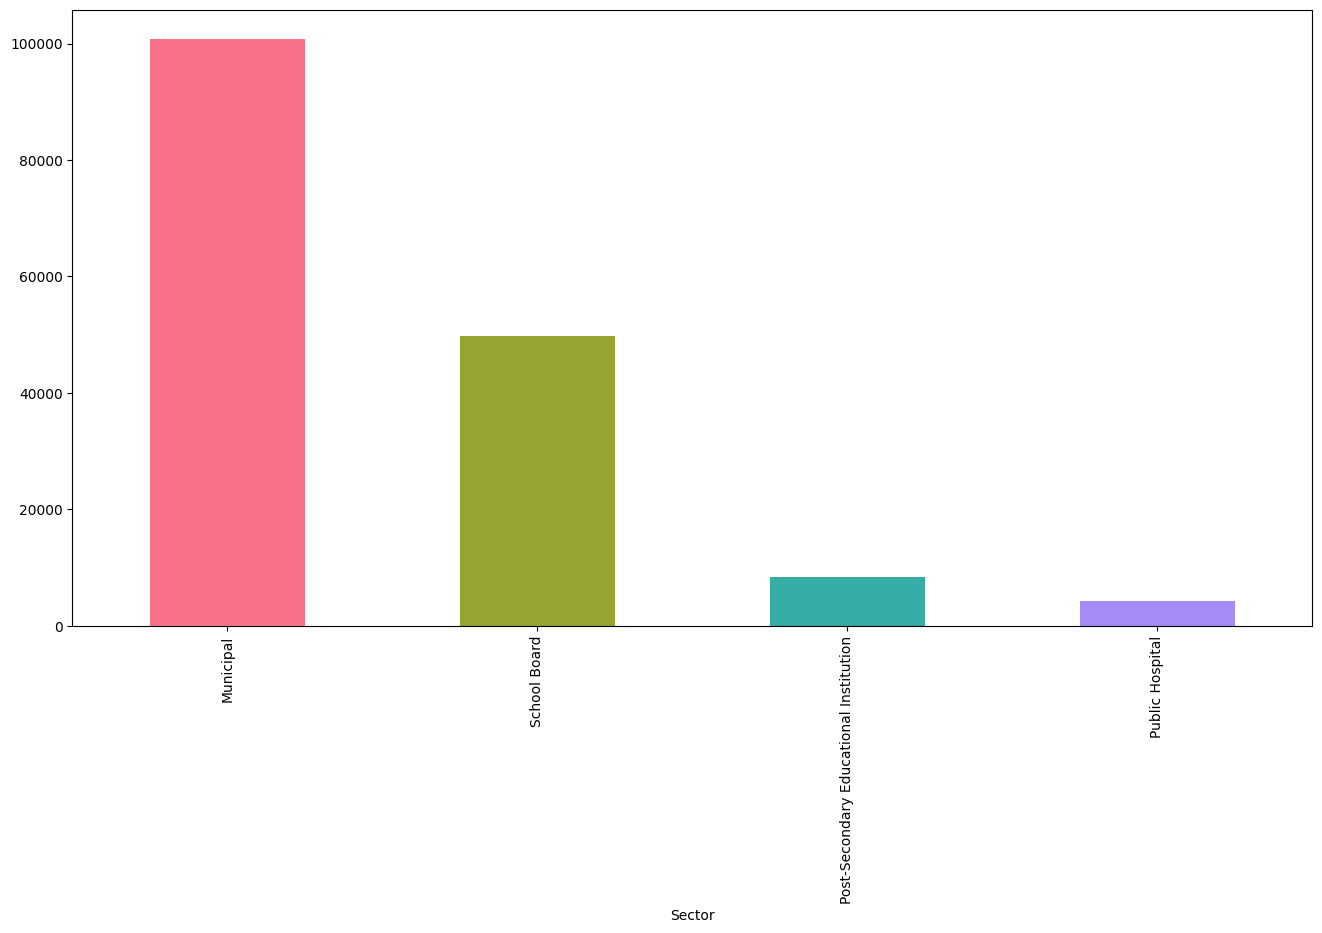

SubSector
Municipality               100273
School Board                49684
College                      5986
Acute/Chronic Hospital       3317
University                   2262
Municipal Service Board       533
Acute Hospital                530
Chronic Hospital              300
University                    126
college                         8
Name: count, dtype: int64


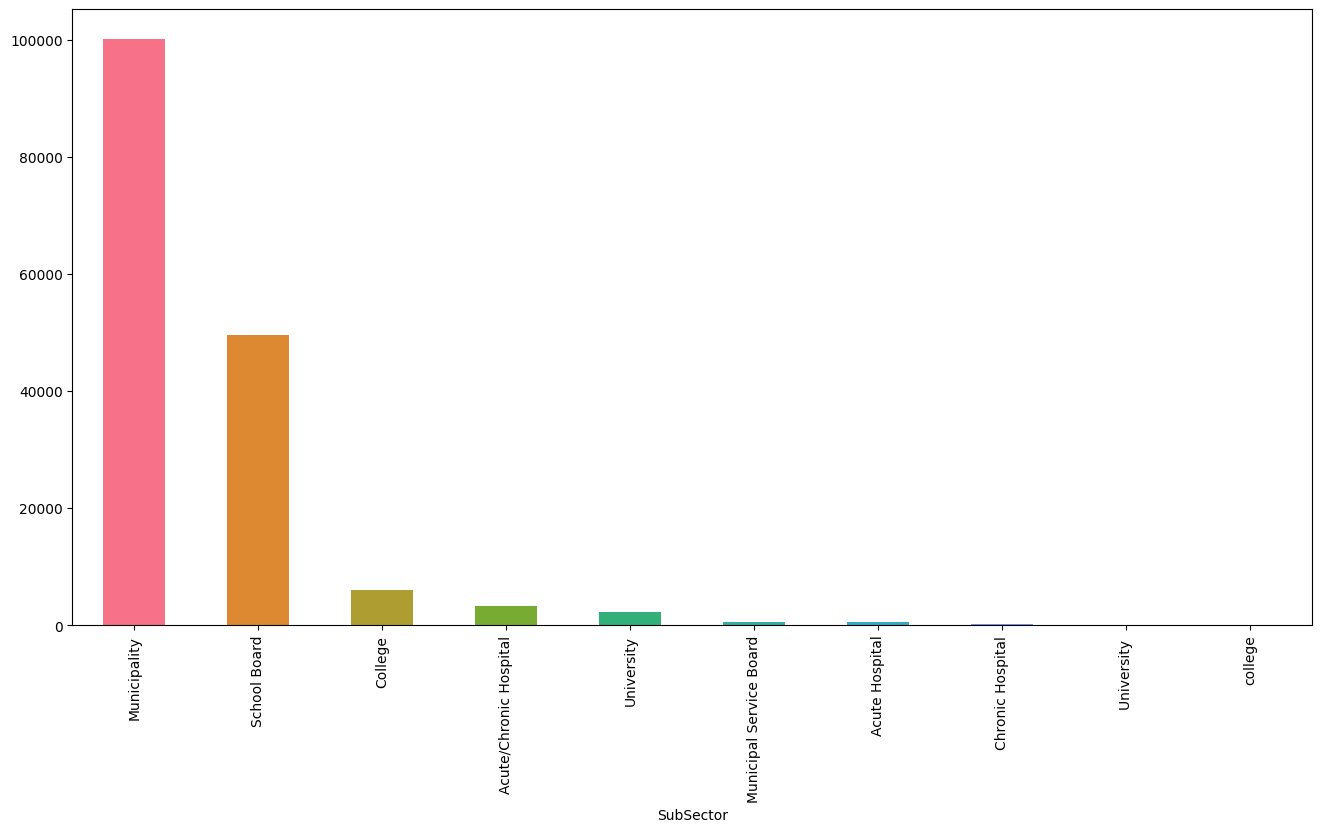

Organization
City of Toronto                                          10288
Toronto District School Board                             5705
Peel District School Board                                2630
City of Greater Sudbury                                   2351
York Region District School Board                         2227
                                                         ...  
Elliot Lake St. Joseph's General Hospital                    6
Orillia Soldiers' Memorial Hospital                          6
Aylmer Area Secondary Water Supply Sustem Joint Board        6
Town of Latchford                                            5
Windsor Hotel-Dieu Grace Hospital                            2
Name: count, Length: 728, dtype: int64


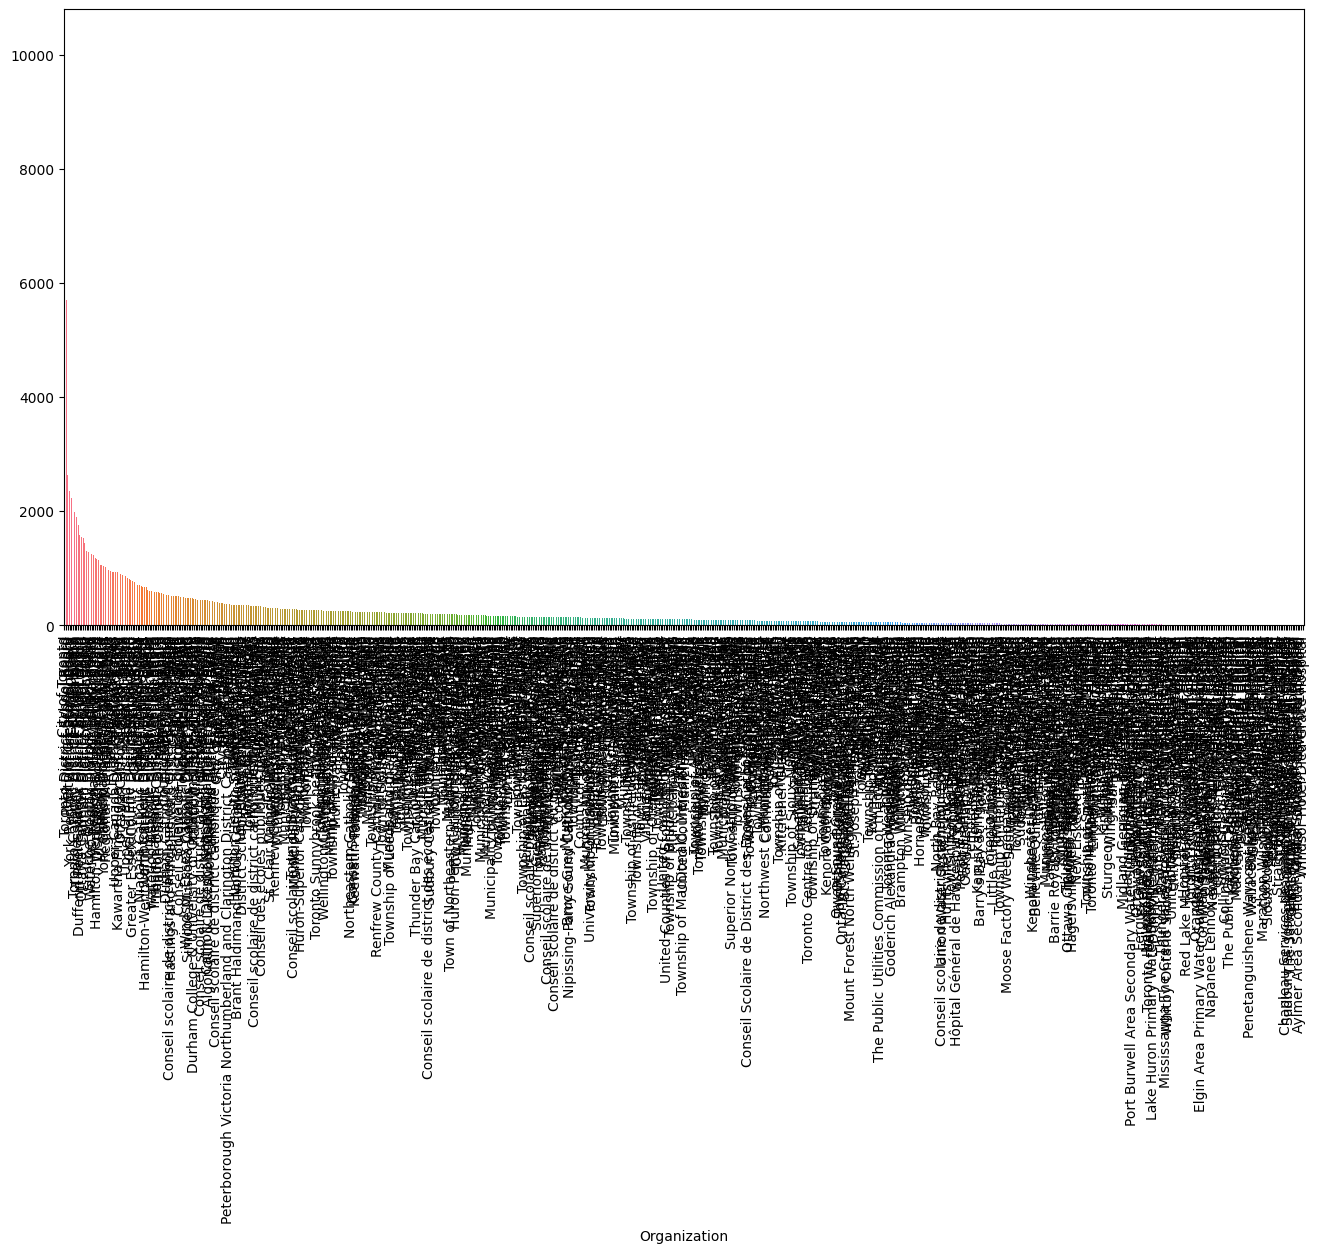

City
Toronto        17487
Ottawa          5456
Brampton        3834
Mississauga     3763
Hamilton        2687
               ...  
 Milton            1
Monteith           1
Kilbride           1
Fergus             1
Inglewood          1
Name: count, Length: 1548, dtype: int64


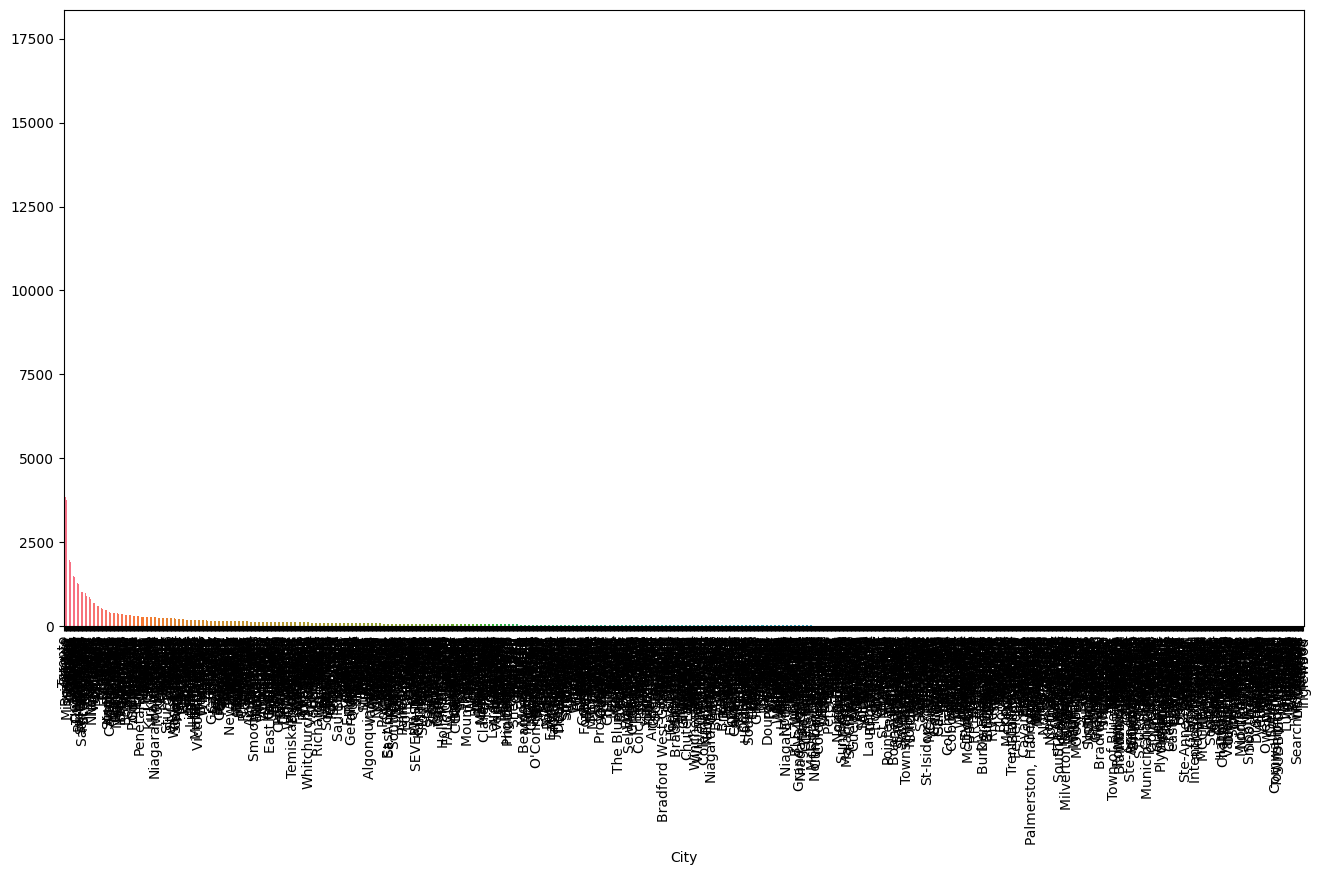

In [9]:
for i in ['Sector','SubSector','Organization','City']:
    plot_cat(i)

# Outlier Analysis

### Using Boxplot

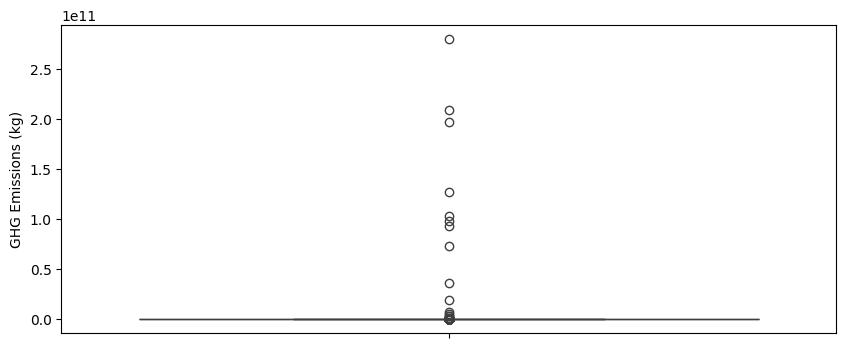

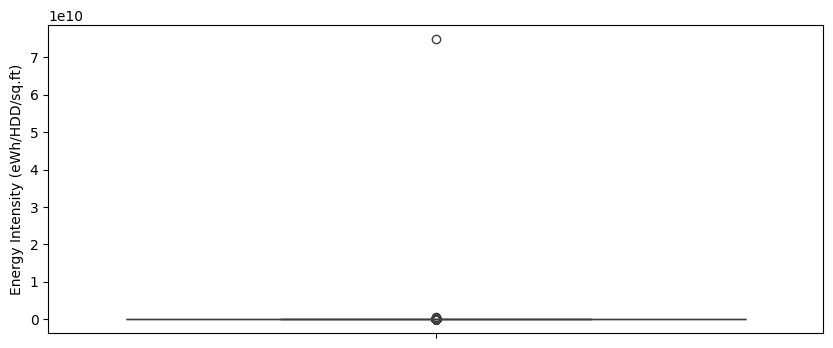

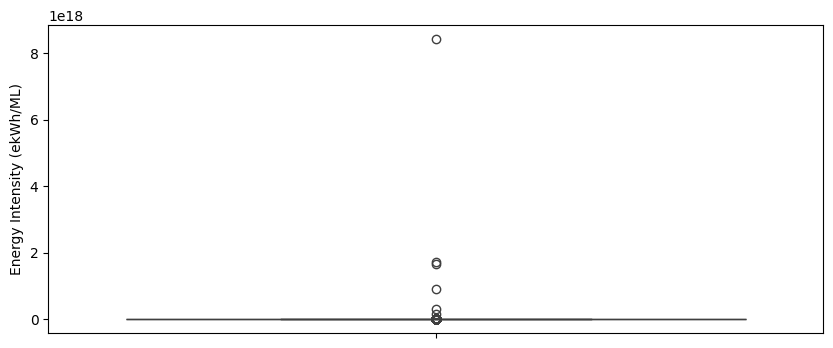

In [10]:
for i in [df['GHG Emissions (kg)'],df['Energy Intensity (eWh/HDD/sq.ft)'],df['Energy Intensity (ekWh/ML)']]:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=i)
    plt.show()

# IQR = Inter Quartile Range

In [13]:
outlier_columns = ['GHG Emissions (kg)', 'Energy Intensity (eWh/HDD/sq.ft)', 'Energy Intensity (ekWh/ML)']
before_stats = df[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = df[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       GHG Emissions (kg)  Energy Intensity (eWh/HDD/sq.ft)  \
count        1.630190e+05                      1.630190e+05   
mean         7.890552e+06                      4.677764e+05   
std          1.143371e+09                      1.854955e+08   
min          0.000000e+00                      0.000000e+00   
25%          5.942070e+03                      3.975493e+00   
50%          3.505488e+04                      6.002112e+00   
75%          1.089258e+05                      8.406814e+00   
max          2.801573e+11                      7.489299e+10   

       Energy Intensity (ekWh/ML)  
count                1.630190e+05  
mean                 8.073983e+13  
std                  2.182577e+16  
min                 -1.272577e+05  
25%                  0.000000e+00  
50%                  3.660398e+02  
75%                  6.476109e+02  
max                  8.426700e+18  

Summary statistics after removing outliers:
       GHG Emissio

# After Removing Outliers

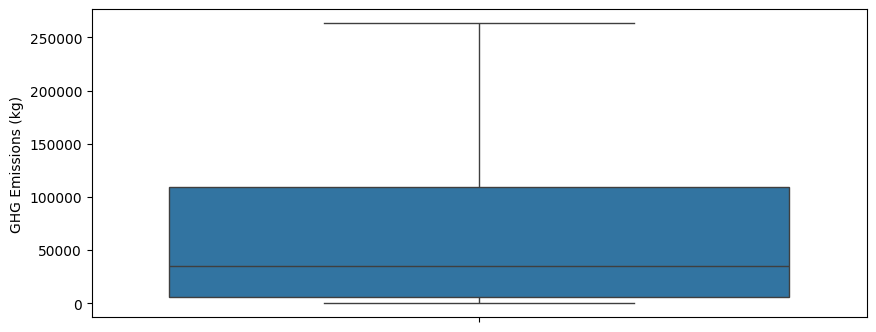

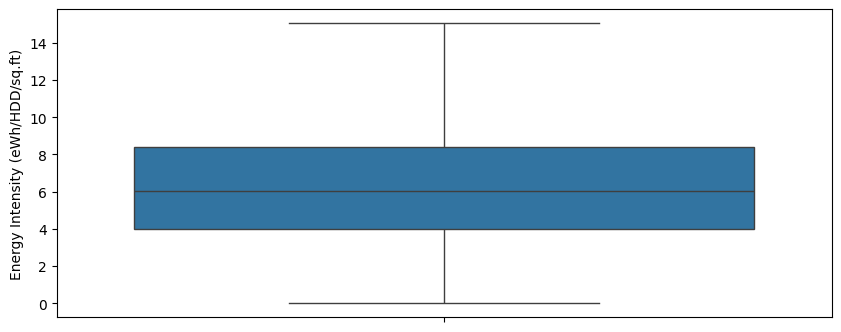

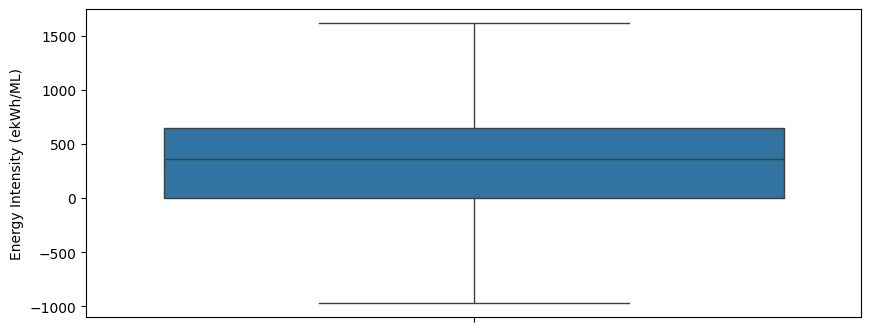

In [14]:
for i in [df['GHG Emissions (kg)'],df['Energy Intensity (eWh/HDD/sq.ft)'],df['Energy Intensity (ekWh/ML)']]:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=i)
    plt.show()

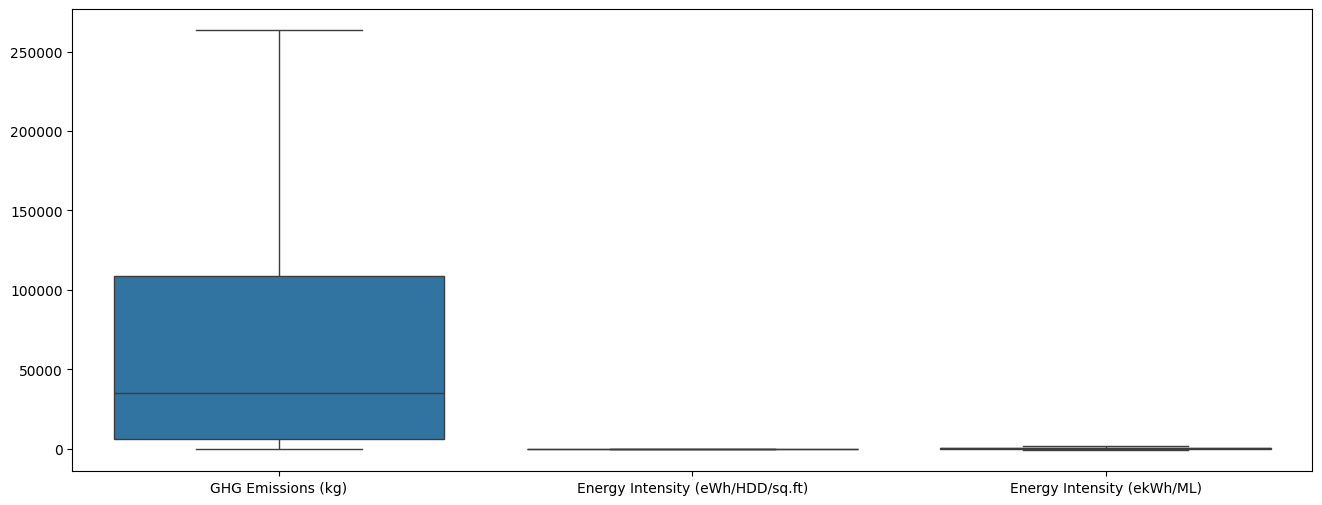

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df)
plt.show()

# Save Data to CSV

In [15]:
df.to_csv('energy_consumption_analysis_2011-2020.csv',index=False)